<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

*The Mayor would like to "move the needle on education". Our firm has been brought in to make recommendations on the best course of action. We will endeavor to use SAT/ACT enrollment and benchmark performance between California school districts in 2018-2019 order to analyze district-level causal factors for over and under performance, with the goal of recommending the most effective and equitable course of action to the town education board.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).


### An analysis of 2018-2019 California School district SAT performance
A broad-spectrum analysis of SAT/ACT performance by California School district is undertaken, using the percent of students scoring at or above the SAT and ACT college-readiness benchmark scores as the primary metric. This report attempts to explain college-readiness benchmark under and overperformance at the school district level through the analysis of enrollment metrics, teacher demographic metrics-such as overall level of teacher education, student-to-teacher ratio and years teaching, as well as school district fiscal data.

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [64]:
# Code:
def mean (args):
    holder = []
    for i in args:
        if np.isnan(i):
            args.remove(i)
        else:
            holder.append(i)
    return sum(holder)/len(holder)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [65]:
import numpy as np

In [66]:
# Code:
# find variance
def variance(args):
    mean_val = mean(args)
    numerator = 0
    for i in args:
        if np.isnan(i):
            args.remove(i)
        else:
            numerator += (i-mean_val)**2
    # population variance
    denominator = len(args) 
    return numerator/denominator

 # find standard deviation
def standard_deviation(args):
    return (variance(args))**.5



3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [67]:
# Code:
def str_to_float(args):
     try: 
          converted_num = float(args.replace('%','')) / 100
          return converted_num
     except:
          return None
str_to_float('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [68]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [69]:
import re
def clean_columns(df):
    df.columns = [col.lower().replace(' ', '_').replace('-','_') for col in df.columns]
    df.columns = [col.replace('\n', '_') for col in df.columns]
    return df

ACT 2017-2019

### California ACT Data

In [70]:
# CA ACT

act_2019_ca_df = pd.read_csv('../data/act_2019_ca.csv')
# drop columns
act_2019_ca_df.drop(columns = ['CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'SName', 'CName', 'Year', 'Unnamed: 17'], inplace=True)
act_2019_ca_df.replace({'*': np.nan}, inplace = True)
act_2019_ca_df = act_2019_ca_df.astype({col:'float' for col in act_2019_ca_df.columns if col not in ['DName']})
# # snake case everything
act_2019_ca_df.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in act_2019_ca_df.columns]
# Merge by school board
agg_functions = {col:'sum' if 'num' in col else 'mean' if 'pct' or 'avg' in col else None for col in act_2019_ca_df.columns if col not in ['D_Name']}
act_2019_ca_df = act_2019_ca_df.groupby(act_2019_ca_df['D_Name']).aggregate(agg_functions)
# clean columns
act_2019_ca_df.columns = [col.lower() for col in act_2019_ca_df.columns]
act_2019_ca_df.rename(columns={'num_g_e':'num_ge_21', 'pct_g_e':'pct_ge_21'}, inplace=True)
# convert percents
act_2019_ca_df['pct_ge_21']= act_2019_ca_df['pct_ge_21']/100
# add act prefix
act_2019_ca_df = act_2019_ca_df.add_prefix('act_')
act_2019_ca_df.index.names = ['d_name']

In [71]:
act_2019_ca_df

,act_enroll,act_num_tst_takr,act_avg_scr_read,act_avg_scr_eng,act_avg_scr_math,act_avg_scr_sci,act_num_ge_21,act_pct_ge_21
d_name,,,,,,,,
ABC Unified,526.166667,72.000000,24.8,24.800000,25.2,24.200000,68.8,0.73016
Acalanes Union High,467.666667,179.666667,28.6,28.400000,27.2,27.000000,194.6,0.90476
Acton-Agua Dulce Unified,193.692308,1.692308,NaN,NaN,NaN,NaN,NaN,NaN
Adelanto Elementary,142.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Alameda County Office of Education,127.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Yosemite Unified,121.333333,24.666667,22.0,21.000000,22.0,22.000000,20.5,0.58520
Yreka Union High,144.000000,38.000000,23.0,20.000000,21.0,21.000000,20.0,0.52630
Yuba City Unified,455.500000,58.000000,23.0,21.666667,22.0,22.666667,47.0,0.61010


### California SAT

In [72]:
# sat_2019_ca
sat_2019_ca_df = pd.read_csv('../data/sat_2019_ca.csv')

# drop columns we're not interested - only want to look at 12th graders
sat_2019_ca_df.drop(sat_2019_ca_df.columns[[0,1,2,3,4,5,8,15,16,17,18,19,20,21]], axis=1, inplace=True)
sat_2019_ca_df.drop('Unnamed: 25', axis=1, inplace = True)
# snake case everything
sat_2019_ca_df.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in sat_2019_ca_df.columns]
# clean columns
sat_2019_ca_df = clean_columns(sat_2019_ca_df)
sat_2019_ca_df.columns = [x.replace('_e_r_w_', '_erw_') for x in sat_2019_ca_df.columns]
sat_2019_ca_df.columns = [x.replace('_t_s_t_', '_tst_') for x in sat_2019_ca_df.columns]
# remove asterisks
sat_2019_ca_df.replace({'*': np.nan}, inplace = True)
# make everything floats that needs to be
sat_2019_ca_df = sat_2019_ca_df.astype({col:'float' for col in sat_2019_ca_df.columns if col not in ['d_name', 'c_name', 'year']})
sat_2019_ca_df['pct_both_benchmark'] = sat_2019_ca_df['pct_both_benchmark']/100
sat_2019_ca_df['pct_erw_benchmark']= sat_2019_ca_df['pct_erw_benchmark']/100
sat_2019_ca_df['pct_math_benchmark']= sat_2019_ca_df['pct_math_benchmark']/100
# aggregate by school district, using mean
agg_functions = {col:'sum' if 'num' in col else 'mean' if 'pct' in col else 'sum' for col in sat_2019_ca_df.columns if col not in ['d_name', 'c_name', 'year']}
sat_2019_ca_df = sat_2019_ca_df.groupby(sat_2019_ca_df['d_name']).aggregate(agg_functions)
sat_2019_ca_df = sat_2019_ca_df.add_prefix('sat_')

In [73]:
sat_2019_ca_df

,sat_num_tst_takr,sat_num_erw_benchmark,sat_pct_erw_benchmark,sat_num_math_benchmark,sat_pct_math_benchmark,sat_enroll,sat_tot_num_both_benchmark,sat_pct_both_benchmark
d_name,,,,,,,,
ABC Unified,1262.0,1041.0,0.824540,839.0,0.672520,3270.0,984.0,0.702040
Acalanes Union High,946.0,904.0,0.959780,786.0,0.833780,2719.0,1343.0,0.934400
Acton-Agua Dulce Unified,224.0,124.0,0.711225,55.0,0.319325,3775.0,87.0,0.476000
Adelanto Elementary,4.0,0.0,NaN,0.0,NaN,188.0,0.0,NaN
Alameda County Office of Education,134.0,51.0,0.397450,19.0,0.147650,283.0,23.0,0.154050
...,...,...,...,...,...,...,...,...
Yosemite Unified,114.0,89.0,0.831050,51.0,0.476850,410.0,84.0,0.785000
Yreka Union High,82.0,62.0,0.756100,48.0,0.585400,287.0,40.0,0.625000
Yuba City Unified,410.0,337.0,0.831467,230.0,0.560167,1934.0,254.0,0.633467


### School District Fiscal Data

https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp

In [74]:
ca_budgets_sd = pd.read_excel('../data/current_expense_1819.xlsx')

# clean columns
ca_budgets_sd.columns = ca_budgets_sd.loc[9]
ca_budgets_sd = ca_budgets_sd[10:].reset_index()
ca_budgets_sd = clean_columns(ca_budgets_sd)
ca_budgets_sd.drop(ca_budgets_sd.columns[[0,1,2]], axis=1, inplace=True)
ca_budgets_sd.rename(columns = {'district':'d_name'}, inplace=True)

# drop unused columns
ca_budgets_sd = ca_budgets_sd.astype({col:'float' for col in ca_budgets_sd.columns if col not in ['d_name', 'lea_type']})
ca_budgets_sd = ca_budgets_sd.query('lea_type != "Elementary"')

Merge SD budget and SD sat Dataframes

In [75]:
merged_ca_sat_rev = pd.merge(sat_2019_ca_df,ca_budgets_sd, left_on='d_name', right_on = 'd_name')

### Student Enrollment Data
https://www.cde.ca.gov/ds/ad/filesenrcum.asp

In [76]:
# read in data
student_enrollment_db = pd.read_csv('../data/cenroll_1819.csv', encoding = 'ISO-8859-1')

In [77]:
# read in enrollment data for students below poverty level
student_enrollment_db_pov = student_enrollment_db.query('ReportingCategory == "SS" and AggregateLevel == "S" and Charter == "All"').copy()
student_enrollment_db_pov.replace({'*': 0}, inplace = True)
student_enrollment_db_pov['CumulativeEnrollment_P'] = student_enrollment_db_pov['CumulativeEnrollment'].astype(float)
student_enrollment_db_pov = student_enrollment_db_pov[['DistrictName', 'CumulativeEnrollment_P']]
# aggregate districs
student_enrollment_db_pov = student_enrollment_db_pov.groupby(student_enrollment_db_pov['DistrictName']).aggregate('sum')
student_enrollment_db_pov.index.names = ['d_name']
student_enrollment_db_pov.rename(columns = {'CumulativeEnrollment_P':'cum_enrollment_sed'},inplace = True)

In [78]:

# Repeat but for all students and remove aggregating data so we don't get 107 billion students
student_enrollment_db = student_enrollment_db.query('ReportingCategory == "TA" and AggregateLevel == "S" and Charter == "All"')
# fix nan values
student_enrollment_db.replace({'*': 0}, inplace = True)
student_enrollment_db['CumulativeEnrollment'] = student_enrollment_db['CumulativeEnrollment'].astype(float)
# drop columns we won't use
student_enrollment_db.drop(['SchoolCode', 'AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode', 'CountyName', 'SchoolName', 'Charter', 'ReportingCategory'], axis=1, inplace=True)
# snake case columns
student_enrollment_db.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in student_enrollment_db.columns]
# clean
student_enrollment_db = clean_columns(student_enrollment_db)
student_enrollment_db_agg = student_enrollment_db.groupby(student_enrollment_db['district_name']).aggregate('sum')
student_enrollment_db_agg.index.names = ['d_name']

In [79]:
student_enrollment_db_agg = student_enrollment_db_agg.merge(student_enrollment_db_pov, left_on='d_name', right_on = 'd_name')
student_enrollment_db_agg['socio_ec_disadv_pct'] = student_enrollment_db_agg['cum_enrollment_sed']/student_enrollment_db_agg['cumulative_enrollment']

In [80]:
student_enrollment_db_agg

,cumulative_enrollment,cum_enrollment_sed,socio_ec_disadv_pct
d_name,,,
ABC Unified,21624.0,11463.0,0.530105
Acalanes Union High,5803.0,453.0,0.078063
Ackerman Charter,615.0,203.0,0.330081
Acton-Agua Dulce Unified,28688.0,15525.0,0.541167
Adelanto Elementary,10545.0,8825.0,0.836890
...,...,...,...
Yreka Union Elementary,1119.0,832.0,0.743521
Yreka Union High,711.0,393.0,0.552743
Yuba City Unified,14625.0,11173.0,0.763966


### Teacher Demographic Data
https://www.cde.ca.gov/ds/ad/staffdemo.asp

In [81]:
# read in csv data
teacher_demo_db = pd.read_csv('../data/staff_demo_18.csv')
# snake case dolumns
teacher_demo_db.columns = ['_'.join(re.findall('[A-Z][a-z]*',x)) for x in teacher_demo_db.columns]
# clean columns
teacher_demo_db = clean_columns(teacher_demo_db)
# Quantify Education Level
edu_level_dict = {'D':10,'S':9,'V':8,'M':7,'U':6,'Y':5,'F':4,'C':3,'B':2,'A':1,'N':0}
teacher_demo_db.replace({"education_level":edu_level_dict}, inplace=True)
# Quantify Sex
sex_dict = {'M':0, 'F':1}
teacher_demo_db.replace({"gender_code":sex_dict}, inplace = True)
# Teachers per District
teachers_per_district = teacher_demo_db['district_name'].value_counts()
# drop columns we don't need
teacher_demo_db.drop(['academic_year', 'rec_i_d', 'district_code', 'county_name', 'ethnic_group', 'employment_status_code', 'f_t_e_teaching', 'f_t_e', 'f_t_e_pupil_services', 'file_created'], axis = 1, inplace=True)
# aggregate by mean statistics per school district
teacher_demo_db_agg = teacher_demo_db.groupby(teacher_demo_db['district_name']).aggregate('mean')
# San Marcos School district data is erroneous, remove San Marcos
teacher_demo_db_agg.drop('San Marcos Unified', inplace=True)
# change index name for merge
teacher_demo_db_agg.index.names = ['d_name']
# add num teachers per district
teacher_demo_db_agg['tchrs_per_district'] = teachers_per_district

In [82]:
# merge with students df
ca_districts_students_teachers = pd.merge(teacher_demo_db_agg, student_enrollment_db_agg, left_on='d_name', right_on='d_name')
# find student teacher ratio
ca_districts_students_teachers['student_teacher_ratio'] = ca_districts_students_teachers['cumulative_enrollment']/ca_districts_students_teachers['tchrs_per_district']

In [83]:
# merge everything
final_merged_df = pd.merge(merged_ca_sat_rev, ca_districts_students_teachers, left_on='d_name', right_on = 'd_name')
# rename columns
final_merged_df.columns = [x.replace('_benchmark', '_over_benchmark') for x in final_merged_df.columns]
final_merged_df.rename({'gender_code':'avg_tchr_sex', 'age':'avg_tchr_age','education_level':'avg_tchr_edu_lvl', 'years_teaching':'avg_tchr_yrs_tching', 'years_in_district':'avg_tchr_yrs_in_dstrct', 'edp_365':'annual_expense_of_ed'}, axis = 1, inplace = True)

In [84]:
final_merged_df = final_merged_df.merge(act_2019_ca_df, left_on='d_name', right_on='d_name')

In [85]:
final_merged_df

,d_name,sat_num_tst_takr,sat_num_erw_over_benchmark,sat_pct_erw_over_benchmark,sat_num_math_over_benchmark,sat_pct_math_over_benchmark,sat_enroll,sat_tot_num_both_over_benchmark,sat_pct_both_over_benchmark,annual_expense_of_ed,...,socio_ec_disadv_pct,student_teacher_ratio,act_enroll,act_num_tst_takr,act_avg_scr_read,act_avg_scr_eng,act_avg_scr_math,act_avg_scr_sci,act_num_ge_21,act_pct_ge_21
0,ABC Unified,1262.0,1041.0,0.824540,839.0,0.672520,3270.0,984.0,0.702040,2.306853e+08,...,0.530105,20.171642,526.166667,72.000000,24.800000,24.800000,25.2,24.200000,68.800000,0.730160
1,Acalanes Union High,946.0,904.0,0.959780,786.0,0.833780,2719.0,1343.0,0.934400,8.012390e+07,...,0.078063,16.771676,467.666667,179.666667,28.600000,28.400000,27.2,27.000000,194.600000,0.904760
2,Acton-Agua Dulce Unified,224.0,124.0,0.711225,55.0,0.319325,3775.0,87.0,0.476000,1.465401e+07,...,0.541167,20.375000,193.692308,1.692308,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda Unified,746.0,576.0,0.750367,479.0,0.570617,1736.0,696.0,0.643300,1.172259e+08,...,0.341723,17.259475,251.428571,44.285714,27.000000,26.333333,26.0,25.000000,85.000000,0.865567
4,Albany City Unified,228.0,214.0,0.938600,194.0,0.850900,523.0,282.0,0.959200,4.661106e+07,...,0.230468,16.785088,301.500000,58.000000,28.000000,27.000000,27.0,26.000000,51.000000,0.879300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Woodland Joint Unified,446.0,306.0,0.682267,194.0,0.433067,1461.0,142.0,0.471900,1.122768e+08,...,0.648234,16.875994,486.666667,92.666667,19.666667,18.666667,19.0,20.000000,35.333333,0.380567
389,Yosemite Unified,114.0,89.0,0.831050,51.0,0.476850,410.0,84.0,0.785000,1.853656e+07,...,0.520483,19.652542,121.333333,24.666667,22.000000,21.000000,22.0,22.000000,20.500000,0.585200
390,Yreka Union High,82.0,62.0,0.756100,48.0,0.585400,287.0,40.0,0.625000,9.151213e+06,...,0.552743,16.534884,144.000000,38.000000,23.000000,20.000000,21.0,21.000000,20.000000,0.526300
391,Yuba City Unified,410.0,337.0,0.831467,230.0,0.560167,1934.0,254.0,0.633467,1.522394e+08,...,0.763966,17.165493,455.500000,58.000000,23.000000,21.666667,22.0,22.666667,47.000000,0.610100


### Final Merged Dataframe
CA Sat data dataframe, school budget dataframe, teacher demographic dataframe, student enrollment dataframe

In [86]:
final_merged_df.sort_values('sat_pct_both_over_benchmark', ascending = False)
# final_merged_df.to_csv('ca_edu_stats_1819.csv')


,d_name,sat_num_tst_takr,sat_num_erw_over_benchmark,sat_pct_erw_over_benchmark,sat_num_math_over_benchmark,sat_pct_math_over_benchmark,sat_enroll,sat_tot_num_both_over_benchmark,sat_pct_both_over_benchmark,annual_expense_of_ed,...,socio_ec_disadv_pct,student_teacher_ratio,act_enroll,act_num_tst_takr,act_avg_scr_read,act_avg_scr_eng,act_avg_scr_math,act_avg_scr_sci,act_num_ge_21,act_pct_ge_21
258,Piedmont City Unified,156.0,130.0,0.920300,120.0,0.850600,414.0,190.0,0.989600,4.245218e+07,...,0.022281,12.146789,152.333333,77.333333,30.000000,31.500000,29.000000,29.0,109.0,0.960650
164,La Canada Unified,340.0,326.0,0.958800,316.0,0.929400,679.0,348.0,0.977500,4.664342e+07,...,0.054932,18.364035,346.500000,138.000000,29.000000,29.000000,29.000000,28.0,130.0,0.942000
197,Manhattan Beach Unified,410.0,404.0,0.985400,358.0,0.873200,1376.0,566.0,0.969200,8.739182e+07,...,0.054030,18.307065,602.000000,269.000000,28.000000,28.000000,27.000000,27.0,245.0,0.910800
49,Carmel Unified,118.0,110.0,0.932200,92.0,0.779700,456.0,176.0,0.967000,5.626410e+07,...,0.186506,13.645503,211.000000,121.000000,26.000000,26.000000,25.000000,25.0,93.0,0.768600
248,Palo Alto Unified,734.0,706.0,0.961867,670.0,0.912867,2038.0,1232.0,0.966267,2.639671e+08,...,0.118780,12.766393,676.000000,302.666667,28.666667,28.666667,28.333333,28.0,262.0,0.866033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Southern Kern Unified,80.0,58.0,0.725000,28.0,0.350000,497.0,0.0,NaN,4.178305e+07,...,0.714914,18.935185,148.666667,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
351,Trona Joint Unified,18.0,0.0,NaN,0.0,NaN,543.0,0.0,NaN,7.416805e+06,...,0.741071,0.846348,215.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN
353,Tulelake Basin Joint Unified,6.0,0.0,NaN,0.0,NaN,59.0,0.0,NaN,5.821483e+06,...,0.853012,14.821429,25.000000,15.000000,18.000000,15.000000,17.000000,18.0,1.0,0.066700
359,Upper Lake Unified,24.0,0.0,NaN,0.0,NaN,148.0,0.0,NaN,1.028738e+07,...,0.796537,17.433962,78.500000,18.000000,18.000000,16.000000,17.000000,17.0,4.0,0.222200


# Data Dictionary
---


| DataFrame            | Description                                                              |
| -------------------- | ------------------------------------------------------------------------ |
| sat_2019_ca          | SAT scores and metrics by school district for 2018-19.                   |
| act_2019_ca          | ACT scores and metrics by school district for 2018-19.                   |
| staff_demo_1819      | A large dataframe of every registered teacher in CA.                     |
| current_expense_1819 | Fiscal info for every school district in CA for the 2018-19 school year. |
| cenroll_1819         | Student enrollment and demographic data by school district for 2018-19.  |
| ca_edu_stats_1819    | Cleaned dataframe merged as appropriate from the above.                  |



---

| Feature                         | Type  | Dataset                   | Description                                                                                                                                                                                                                                                                                                                          |
| ------------------------------- | ----- | ------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| d_name                          | str   | All                       | The school district within California.                                                                                                                                                                                                                                                                                               |
| sat_enroll                      | float | CA 2019 SAT               | The number of 12th graders enrolled to take the SAT in 2018-2019.                                                                                                                                                                                                                                                                    |
| sat_num_tst_taker               | float | CA 2019 SAT               | The count of 12th graders that took the SAT in 2018-2019.                                                                                                                                                                                                                                                                            |
| sat_num_erw_over_benchmark      | float | CA 2019 SAT               | The count of 12th graders that exceeded the readiness benchmark in exploratory reading and writing(erw).                                                                                                                                                                                                                        |
| sat_pct_erw_over_benchmark      | float | CA 2019 SAT               | The percent of 12th graders that exceeded the readiness benchmark in exploratory reading and writing(erw).                                                                                                                                                                                                                      |
| sat_num_math_over_benchmark     | float | CA 2019 SAT               | The count of 12th graders that exceeded the readiness benchmark in math.                                                                                                                                                                                                                                                        |
| sat_pct_math_over_benchmark     | float | CA 2019 SAT               | The percent of 12th graders that exceeded the readiness benchmark in math.                                                                                                                                                                                                                                                      |
| sat_tot_num_both_over_benchmark | float | CA 2019 SAT               | The count of 12th graders that exceeded the readiness benchmark in math and erw.                                                                                                                                                                                                                                                |
| sat_pct_both_over_benchmark     | float | CA 2019 SAT               | The percent of 12th graders that exceeded the readiness benchmark in math and erw.                                                                                                                                                                                                                                              |
| annual_expense_of_ed            | float | CA School District Fiscal | Total general fund expenditures less food services, facilities acquisition and construction and certain other terms, divided by (ADA). <br/> The total days of student attendance divided by the number of instructional days in the year.                                                                                           |
| current_expense_per_ada         | float | CA School District Fiscal | annual_expense_of_ed divided by ADA -- the per-pupil cost of education per school board for 2018-2019.                                                                                                                                                                                                                               |
| lea_type                        | str   | CA School District Fiscal | Type of school district.                                                                                                                                                                                                                                                                                                             |
| avg_tchr_sex                    | float | CA Teacher Demographics   | Average sex of teachers within school district.                                                                                                                                                                                                                                                                                      |
| avg_tchr_edu_lvl                | float | CA Teacher Demographics   | Average level of education held by teachers within school district. <br/> 10 = Doctorate, 9 = Special, 8 = Master's + 30 or more semester hours, 7 = Master's, 6 = 5th year within bachelor's,<br /> 5 = 5th year induction, 4 = 5th year, 3 = Bachelors + 30 or more semester hours, 2 = Bachelors, 1 = Associate, 0 = Not reported |
| avg_tchr_yrs_tching             | float | CA Teacher Demographics   | Average number of years as a teacher.                                                                                                                                                                                                                                                                                                |
| avg_tchr_yrs_in_dstrct          | float | CA Teacher Demographics   | Average number of years teaching within that specific school district.                                                                                                                                                                                                                                                               |
| tchrs_per_district              | int   | CA Teacher Demographics   | Total number of teachers per school district.                                                                                                                                                                                                                                                                                        |
| cumulative_enrollment           | float | CA Student Enrollment     | Total number of students enrolled per school district.                                                                                                                                                                                                                                                                               |
| student_teacher_ratio           | float | CA Student/CA Teacher     | Average student to teacher ratio per school district.                                                                                                                                                                                                                                                                                |
| cum_enrollment_sed              | float | CA Student                | Total number of socioeconomically disadvantaged students/district.                                                                                                                                                                                                                                                                   |
| socio_ec_disadv_pct             | float | CA Student                | The percent of students that are socioeconomically disadvantaged/district.                                                                                                                                                                                                                                                           |
| act_enroll                      | float | CA 2019 ACT               | The number of 12th graders enrolled to take the ACT in 2018-19.                                                                                                                                                                                                                                                                      |
| act_num_tst_takr                | float | CA 2019 ACT               | The number of 12th graders that took the ACT in 2018-19.                                                                                                                                                                                                                                                                             |
| act_avg_scr_read                | float | CA 2019 ACT               | Average ACT reading score.                                                                                                                                                                                                                                                                                                           |
| act_avg_scr_eng                 | float | CA 2019 ACT               | Average ACT english score.                                                                                                                                                                                                                                                                                                           |
| act_avg_scr_math                | float | CA 2019 ACT               | Average ACT math score.                                                                                                                                                                                                                                                                                                              |
| act_avg_scr_sci                 | float | CA 2019 ACT               | Average ACT science score.                                                                                                                                                                                                                                                                                                           |
| act_num_ge_21                   | float | CA 2019 ACT               | The count of 12th graders scoring in excess of the ACT benchmark.                                                                                                                                                                                                                                                                    |
| act_pct_ge_21                   | float | CA 2019 ACT               | The percent of 12th graders that exceeded the ACT readiness benchmark.                                                                                                                                                                                                                                                                                                                                     |



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where:
        - Each column name is now a key
        - That standard deviation of the column is the value
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [87]:
#Code:
sd = {col:standard_deviation(final_merged_df[col].to_list()) if final_merged_df[col].dtypes !='object' else None for col in final_merged_df.columns}
sd

{'d_name': None,
 'sat_num_tst_takr': 2251.3991326600167,
 'sat_num_erw_over_benchmark': 1248.26533115584,
 'sat_pct_erw_over_benchmark': 0.15875518779926956,
 'sat_num_math_over_benchmark': 788.8837198645268,
 'sat_pct_math_over_benchmark': 0.20475538475278743,
 'sat_enroll': 4876.865288902886,
 'sat_tot_num_both_over_benchmark': 1066.1544502490103,
 'sat_pct_both_over_benchmark': 0.2285826074043896,
 'annual_expense_of_ed': 390148600.8441182,
 'current_expense_ada': 25321.528852231462,
 'current_expense_per_ada': 2999.7817621828963,
 'lea_type': None,
 'avg_tchr_sex': 0.0858512109164387,
 'avg_tchr_age': 2.1147815440624145,
 'avg_tchr_edu_lvl': 0.8808032733007137,
 'avg_tchr_yrs_tching': 2.285812283941066,
 'avg_tchr_yrs_in_dstrct': 2.54929700679066,
 'tchrs_per_district': 2066.170487943229,
 'cumulative_enrollment': 35768.20753448485,
 'cum_enrollment_sed': 28282.480170742572,
 'socio_ec_disadv_pct': 0.22587570117931247,
 'student_teacher_ratio': 3.242378895840655,
 'act_enroll': 26

# 2.0 What was the difference in school district test enrollment and overall performance between the SAT and ACT for the 2018-2019 test year?

In [88]:
final_merged_df.head()

# total tests
print('2018-19 Total CA 12th graders ACT test takers: {:,.0f}'.format(final_merged_df['act_num_tst_takr'].sum()))
print('2018-19 Total CA 12th graders SAT test takers: {:,.0f}'.format(final_merged_df['sat_num_tst_takr'].sum()))
# IQR
print('2018-19 CA 12th grader benchmark SAT IQR: {:.2f}'.format(final_merged_df['sat_pct_both_over_benchmark'].quantile(.75)-
                                             final_merged_df['sat_pct_both_over_benchmark'].quantile(.25)))
print('2018-19 CA 12th grader benchmark ACT IQR: {:.2f}'.format(final_merged_df['act_pct_ge_21'].quantile(.75)-
                                             final_merged_df['act_pct_ge_21'].quantile(.25)))
# all descriptive statistics
final_merged_df[['d_name', 'sat_pct_both_over_benchmark', 'act_pct_ge_21','sat_num_tst_takr', 'act_num_tst_takr']].describe()

2018-19 Total CA 12th graders ACT test takers: 26,593
2018-19 Total CA 12th graders SAT test takers: 326,823
2018-19 CA 12th grader benchmark SAT IQR: 0.36
2018-19 CA 12th grader benchmark ACT IQR: 0.37


,sat_pct_both_over_benchmark,act_pct_ge_21,sat_num_tst_takr,act_num_tst_takr
count,350.000000,317.000000,393.000000,393.000000
mean,0.583108,0.563110,831.610687,67.665418
std,0.230618,0.228528,2254.268986,73.322390
min,0.009600,0.000000,0.000000,0.000000
25%,0.401744,0.377150,92.000000,16.000000
50%,0.613725,0.585200,326.000000,47.000000
75%,0.762967,0.748660,876.000000,93.000000
max,0.989600,0.961700,39968.000000,640.500000


# 2.0 Discussion

### Number of Test Takers

The CollegeBoard SAT was the more popular choice amongst the 393 California school districts selected for study. Of the 353,416 students studied, 326,823 took the SAT and 26,593 took the ACT, making the SAT the primary selection for standardized test taking amongst school districts in the state of California.

### SAT vs. ACT Performance

The Collegeboard which produces the SAT and the
Of the 326,823 12th graders who took the SAT in 2018-2018, 58% scored above the Collegeboard benchmark and of the 26,593 students that took the ACT 56% scored above the benchmark. The amount of variance in test results was also quite similar between the two tests, with the SAT benchmark results exhibiting a standard deviation of 23% and the ACT results exhibiting a standard deviation of 23%, with nearly identical Inner Quartile Ranges.

The results suggest that either test can stand as a proxy for the assessed scholastic level of a school district and that the SAT is the overwhelming selection for standardized testing in California.

### What was the difference in results between subjects?

In [220]:
final_merged_df[['d_name', 'sat_pct_math_over_benchmark', 'sat_pct_erw_over_benchmark']].describe()

,sat_pct_math_over_benchmark,sat_pct_erw_over_benchmark
count,355.000000,355.000000
mean,0.499633,0.730242
std,0.205525,0.159857
min,0.000000,0.253700
25%,0.339925,0.622820
50%,0.495983,0.752517
75%,0.663733,0.862300
max,0.933300,1.000000


# 2.1 Which school districts out performed the SAT benchmarks by the highest margin in 2018-2019 and how large are the districts?


In [173]:
# top
top_ten_sat = final_merged_df.sort_values('sat_pct_both_over_benchmark', ascending = False).head(10)
print('Upper Ten SAT')
display(top_ten_sat[['d_name', 'sat_pct_both_over_benchmark', 'cumulative_enrollment']])
print('Summary Statistics')
display(top_ten_sat[['d_name', 'sat_pct_both_over_benchmark', 'cumulative_enrollment']].describe())
# bottom
print('Lower Ten SAT')
bottom_ten_sat = final_merged_df.sort_values('sat_pct_both_over_benchmark', ascending = True).head(10)
display(bottom_ten_sat[['d_name', 'sat_pct_both_over_benchmark', 'cumulative_enrollment']])
print('Summary Statistics')
display(bottom_ten_sat[['d_name', 'sat_pct_both_over_benchmark', 'cumulative_enrollment']].describe())


Upper Ten SAT


,d_name,sat_pct_both_over_benchmark,cumulative_enrollment
258,Piedmont City Unified,0.989600,2648.0
164,La Canada Unified,0.977500,4187.0
197,Manhattan Beach Unified,0.969200,6737.0
49,Carmel Unified,0.967000,2579.0
248,Palo Alto Unified,0.966267,12460.0
302,San Marino Unified,0.963400,3060.0
190,Los Gatos-Saratoga Joint Union High,0.959800,3574.0
4,Albany City Unified,0.959200,3827.0
152,Irvine Unified,0.955317,37463.0
332,South Pasadena Unified,0.939600,5021.0


Summary Statistics


,sat_pct_both_over_benchmark,cumulative_enrollment
count,10.000000,10.000000
mean,0.964688,8155.600000
std,0.013274,10709.106117
min,0.939600,2579.000000
25%,0.959350,3188.500000
50%,0.964833,4007.000000
75%,0.968650,6308.000000
max,0.989600,37463.000000


Lower Ten SAT


,d_name,sat_pct_both_over_benchmark,cumulative_enrollment
134,Golden Plains Unified,0.009600,1818.0
304,San Pasqual Valley Unified,0.058800,784.0
113,Farmersville Unified,0.083300,2717.0
194,Lynwood Unified,0.092300,14764.0
45,Calistoga Joint Unified,0.096800,897.0
252,Paramount Unified,0.106667,15899.0
195,Madera Unified,0.127750,22685.0
136,Gonzales Unified,0.129000,2507.0
74,Corcoran Joint Unified,0.138900,3577.0
81,Cutler-Orosi Joint Unified,0.150400,4448.0


Summary Statistics


,sat_pct_both_over_benchmark,cumulative_enrollment
count,10.000000,10.000000
mean,0.099352,7009.600000
std,0.042062,7781.669061
min,0.009600,784.000000
25%,0.085550,1990.250000
50%,0.101733,3147.000000
75%,0.128688,12185.000000
max,0.150400,22685.000000


# 2.1 Discussion

#### Benchmark Performance
In an effort to identify and recommend any causal factors to the town school board, we sort the school districts into ten that met the SAT performance benchmark by the largest percent, and ten that failed to meet the performance benchmark by the largest percent. Amongst the top ten school districts, the mean percent of students that met the performance benchmarks for math and E.R.W. was 96% with a standard deviation of 1%. Amongst the bottom ten school districts, the mean percent of students that met the readiness benchmarks for math and E.R.W. was 10%, with a standard deviation of 4%.
#### Enrollment
The top and bottom ten school districts showed similar student enrollment levels, with the top ten having a mean student enrollment of 8155 students with a standard deviation of 10,709 and the bottom ten school districts having a mean student enrollment of 7009 students and a standard deviation of 7781 students.

### 2.1.1 Was there any difference in ACT Performance vs. SAT performance?

In [276]:
# upper
print('Upper Ten')
top_ten_act = final_merged_df.sort_values('act_pct_ge_21', ascending = False).head(10)
display(top_ten_act[['d_name', 'act_pct_ge_21', 'cumulative_enrollment']])

# lower
print('Lower Ten')
bottom_ten_act = final_merged_df.sort_values('act_pct_ge_21', ascending = True).head(10)
bottom_ten_act[['d_name', 'act_pct_ge_21', 'cumulative_enrollment']]

Upper Ten


,d_name,act_pct_ge_21,cumulative_enrollment
190,Los Gatos-Saratoga Joint Union High,0.96170,3574.0
258,Piedmont City Unified,0.96065,2648.0
164,La Canada Unified,0.94200,4187.0
236,Oak Park Unified,0.93855,4742.0
83,Davis Joint Unified,0.93350,9045.0
321,Sierra Sands Unified,0.93330,5570.0
124,Fremont Union High,0.92910,11335.0
152,Irvine Unified,0.91674,37463.0
15,Arcadia Unified,0.91150,9767.0
197,Manhattan Beach Unified,0.91080,6737.0


Lower Ten


,d_name,act_pct_ge_21,cumulative_enrollment
134,Golden Plains Unified,0.000000,1818.0
274,Reef-Sunset Unified,0.035700,2860.0
353,Tulelake Basin Joint Unified,0.066700,415.0
205,Mendota Unified,0.085400,3797.0
210,Mojave Unified,0.085450,3314.0
118,Fontana Unified,0.088587,39854.0
116,Firebaugh-Las Deltas Unified,0.096800,2365.0
72,Compton Unified,0.108717,25879.0
81,Cutler-Orosi Joint Unified,0.117600,4448.0
175,Le Grand Union High,0.121200,548.0


# 2.2 What is the distribution of teacher education and experience for the 10 over and under-performing school districts?


In [91]:
print('Upper Ten School Districts')
display(top_ten_sat[['avg_tchr_age', 'avg_tchr_yrs_tching','avg_tchr_yrs_in_dstrct','avg_tchr_edu_lvl']].describe())

print('Lower Ten School Districts')
display(bottom_ten_sat[['avg_tchr_age','avg_tchr_yrs_tching','avg_tchr_yrs_in_dstrct','avg_tchr_edu_lvl']].describe())

Upper Ten School Districts


,avg_tchr_age,avg_tchr_yrs_tching,avg_tchr_yrs_in_dstrct,avg_tchr_edu_lvl
count,10.000000,10.000000,10.000000,10.000000
mean,45.301337,15.538576,10.678905,5.883771
std,1.923715,2.069405,1.066342,0.583332
min,40.714450,12.965023,8.798246,4.780702
25%,45.054738,13.581317,10.324436,5.723911
50%,45.399293,16.091565,10.717773,5.995866
75%,46.288084,16.994173,11.446923,6.147078
max,47.600917,18.529101,12.190217,6.894022


Lower Ten School Districts


,avg_tchr_age,avg_tchr_yrs_tching,avg_tchr_yrs_in_dstrct,avg_tchr_edu_lvl
count,10.000000,10.000000,10.000000,10.000000
mean,44.413705,13.570482,10.617683,4.529572
std,2.000662,1.672202,1.858646,0.919984
min,41.710526,10.368421,8.194737,3.234694
25%,43.133391,12.994700,9.108020,3.966645
50%,44.732534,13.776166,10.706164,4.357047
75%,45.357331,14.875783,11.227037,4.932954
max,48.303571,15.732143,13.637784,6.205650


# 2.2 Discussion

Our firm suspected that the distribution of quality teachers amongst districts was a causual factor in the disparity in benchmark performance between the top and bottom ten school districts. Our hypothesis was that the top ten performing school districts had a faculty that was both higher-educated and more experienced.

#### Process
https://www.cde.ca.gov/ds/ad/fsstaffdemo15.asp

The California Department of Education provides employment data for all school districts, we aggregated the employment database by school district in order to get a better district-level picture, and then calculated summary statistics on the various metrics, which included education level, years teaching and years teaching within that district. In order to gain a more quantitative picture of faculty education, we converted the listed Education Level into numerica values. The listed education levels and there numeric equivalent are:

D = Doctorate : 10
S = Special : 9
V = Master's degree plus 30 or more semester hours : 8
M = Master's degree : 7
U = Fifth year within bachelor's degree : 6
Y = Fifth year induction : 5
F = Fifth year : 4
C = Baccalaureate plus 30 or more semester hours : 3
B = Baccalaureate : 2
A = Associate degree : 1
N = Not reported : 0
#### Distribution of Experience and Education Amongst District Faculty
We found that amongst the top 10 school districts the mean level of education was 5.8, and amongst the bottom 10 school districts the mean level was 4.5, which suggests that the top 10 school districts enjoy the advantage of better educated and more highly credentialed teachers than the lower ten school districts. Additionally, we found that the top 10 school districts had more experienced faculty, with the mean level of years teaching being 15.5 vs. 13.5 in the lower ten school districts. Interestingly, both the top ten and lower ten school districts had the same mean level of teacher years within the district, at 10.6 years and a similar age distribution with the means between the districts being 45 in the higher ten and 44 in the lower ten.

# 2.3 What is the distribution of enrollment data between the top over and under performing school districts?


In [92]:
print('Upper Ten School Districts')
display(top_ten_sat[['cumulative_enrollment', 'student_teacher_ratio']].describe())

print('Lower Ten School Districts')
display(bottom_ten_sat[['cumulative_enrollment','student_teacher_ratio']].describe())

Upper Ten School Districts


,cumulative_enrollment,student_teacher_ratio
count,10.000000,10.000000
mean,8155.600000,16.728995
std,10709.106117,3.094461
min,2579.000000,12.146789
25%,3188.500000,14.325036
50%,4007.000000,17.025394
75%,6308.000000,18.349793
max,37463.000000,21.481078


Lower Ten School Districts


,cumulative_enrollment,student_teacher_ratio
count,10.000000,10.000000
mean,7009.600000,17.818055
std,7781.669061,2.178038
min,784.000000,14.000000
25%,1990.250000,17.972073
50%,3147.000000,18.445128
75%,12185.000000,18.757492
max,22685.000000,20.971591


# 2.3 Discussion

In order to get a district-level datapoint for student-teacher ratio, we again utilized the 2018-19 teacher demographic database provided on the California D.O.E. website. The aggregated number of teachers per district was divided by the aggregated student enrollment data provided in the CA student demographic database, in order to derive the student-to-teacher ratio. Our hypothesis was that student-teacher ratio was a causal factor in the over and under performance of CA districts.

The prevailing theory underlying student-teacher ratio is that a lower ratio describes a situation where individual students are afforded more individual priority and thus a higher level of education. Our hypothesis was that the upper ten school districts had a lower student-teacher ratio than the lower ten school districts. We found that the mean student-teacher ratio for the upper ten districts was 16.7 with a standard deviation of 3 and 17.8 for the lower districts with a standard deviation of 2.


#### Analysis
The mean student-teacher ratio for the upper 10 school districts is to the right of the overall distribution amongst the 393 school districts, while the mean for lower 10 school districts is very close to the mean for the overall population. These results suggest that there is a correlation between a lower student-teacher ratio and district level standardized test performance.

# 2.4 What is the distribution of socioeconomic disadvantage and school district fiscal data between the top ten and bottom ten school districts?



In [93]:
print('Top Ten School Districts')
display(top_ten_sat[['annual_expense_of_ed', 'current_expense_per_ada', 'socio_ec_disadv_pct']].describe())

print('Bottom Ten School Districts')
display(bottom_ten_sat[['annual_expense_of_ed','current_expense_per_ada', 'socio_ec_disadv_pct']].describe())

Top Ten School Districts


,annual_expense_of_ed,current_expense_per_ada,socio_ec_disadv_pct
count,1.000000e+01,10.000000,10.000000
mean,1.068747e+08,15502.352629,0.118742
std,1.164262e+08,4680.582616,0.076070
min,4.060201e+07,10788.064487,0.022281
25%,4.661915e+07,11953.157902,0.054255
50%,5.309169e+07,13916.344998,0.100076
75%,8.003194e+07,17064.141153,0.190024
max,3.769439e+08,23849.613547,0.230468


Bottom Ten School Districts


,annual_expense_of_ed,current_expense_per_ada,socio_ec_disadv_pct
count,1.000000e+01,10.000000,10.000000
mean,8.057625e+07,15095.944355,0.906395
std,8.352583e+07,3640.564248,0.066132
min,1.509451e+07,12480.596162,0.756968
25%,2.553351e+07,13123.048670,0.890232
50%,3.637803e+07,13458.229620,0.931978
75%,1.420587e+08,15026.885194,0.954892
max,2.357376e+08,23370.819747,0.960249


# 2.4 Discussion

Our hypothesis was that school district benchmark performance was tied to district level of funding, as without an equitable distribution of funding between districts there is a gap in access and resources. California has several statistics with which to measure district level fiscal data. We examined two major distrivel level fiscal statistics, current expense per average daily attendance and annual expense of education.

#### Fiscal Metrics and Grants
The Califonia DOE https://www.cde.ca.gov/ds/fd/ec/currentexpense.asp define an average daily attendance (ADA) as 'the total days of student attendance divided by the total days of instruction.' The annual expense of education is the annualized total cost within the school district, when this is divded by ADA we arrive at the per-pupil cost of education at the district level.

We found that the mean expense/ADA for the upper 10 districts was 15,502 and the mean expense/ADA for the lower 10 districts was 15,095, a similar number that we found surprising until we researched the fiscal history of California school districts. California recently overhauled its school grant allocation formula : https://www.cde.ca.gov/fg/aa/lc/lcffoverview.asp. The new funding formula (LCFF) provides for uniform distribution of district funding adjusted by ADA, and special grants allowing for equity and access, and replaces the system that had existed for 40 years prior to 2014.

#### Student Socioeconomic Status
While the current and newly approved funding regime is similar, the student socio-economic demographical breakdown is telling. Amongst the upper ten school districts, the percent of student body that is socioeconomically disadvantaged is 11.8% whilst in the lower ten school districts it is an overwhelming 90.6%. This data suggests a strong correlation between socioeconomic disadvantage within a school district and that district's performance on the college-readiness benchmarks.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots.
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [94]:
final_merged_df['act_num_tst_takr'].sum()

26592.50930957931

# District level comparison of SAT and ACT performance

The dataset consisted of $393$ California school districts spanning the entire state, within those districts, only the 12th grade class was used. Of the 393 selected school districts, there were $326,823$ SAT test takers and $26,592$ ACT test takers, making the SAT overwhelmingly more popular amongst CA school districts.

The metric chosen to distinguish upper and lower performing school districts was the percentage of student body, per school district, that outperformed the CollegeBoard SAT and ACT College Readiness benchmarks. The collegeboard and ACT benchmarks vary by grade level and score, but represent the same thing: a $75$% probability of the student earning at least a **C** in first-semester college courses. (see: [CollegeBoard guide to SAT Benchmarks](https://satsuite.collegeboard.org/media/pdf/educator-benchmark-brief.pdf)). https://www.act.org/content/dam/act/unsecured/documents/benchmarks.pdf

### Number of SAT vs. ACT Test Takers

The SAT remains a far more popular test amongst CA School districts. Of the 353,416 students studied, 326,823 took the SAT and 26,593 took the ACT.

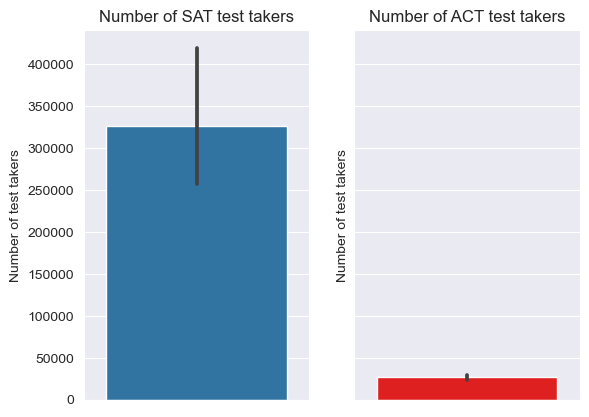

In [165]:
fig, axs = plt.subplots(1,2, sharey=True)

sns.barplot(final_merged_df, y = 'sat_num_tst_takr', estimator = 'sum', ax = axs[0])
sns.barplot(final_merged_df, y = 'act_num_tst_takr', estimator = 'sum', ax = axs[1], color='r')
axs[0].set(title = 'Number of SAT test takers', ylabel = 'Number of test takers')
axs[1].set(title = 'Number of ACT test takers', ylabel = 'Number of test takers');

### Histogram of SAT/ACT performance across 393 CA School Districts

The metric chosen for the below plot is the percent of student body that met the readiness benchmark on the respective test across *all* subjects.

**Different Tests, Similar Results**

The SAT and ACT show very a similar distribution of scores across all sampled CA school districts. In the plot below, the SAT is plotted in blue and the ACT is plotted in red, with the mean percent of students meeting the readiness benchmark across the population of school districts plotted as a vertical line. The kernel density plot included for both in order to provide a quick visual assessment of the shape of the distribution. The visual plot shows the results of the summary statistics in a visually cohesive way, of the 326,823 12th graders who took the SAT in 2018-2018, 58% scored above the Collegeboard benchmark and of the 26,593 students that took the ACT 56% scored above the benchmark.

The amount of variance in test results was also quite similar between the two tests, with the SAT benchmark results exhibiting a standard deviation of 23% and the ACT results exhibiting a standard deviation of 23%, with nearly identical Inner Quartile Ranges. For this reason, the two histograms nearly line up on each other.

**Analysis**

Both distributions are not normally distributed, which is as expected, we would hope that a majority of the student body across CA school districts would meet the readiness benchmarks. The distribution of student body readiness has a left tail and a peak showing that roughly 12 % of the school districts in the sample had 70% of their student body surpassing the readiness benchmarks. Additionally, it is unlikely, in the mind of the firm that one standardized test would be markedly different from another, as all school districts would likely switch to the test that yields the most impressive results. The difference in SAT/ACT enrollment in California went unstudied in our analysis.

**Conclusion**

ACT/SAT results for the 2018-2019 school year in California are similar and either test can serve as a proxy for college-readiness

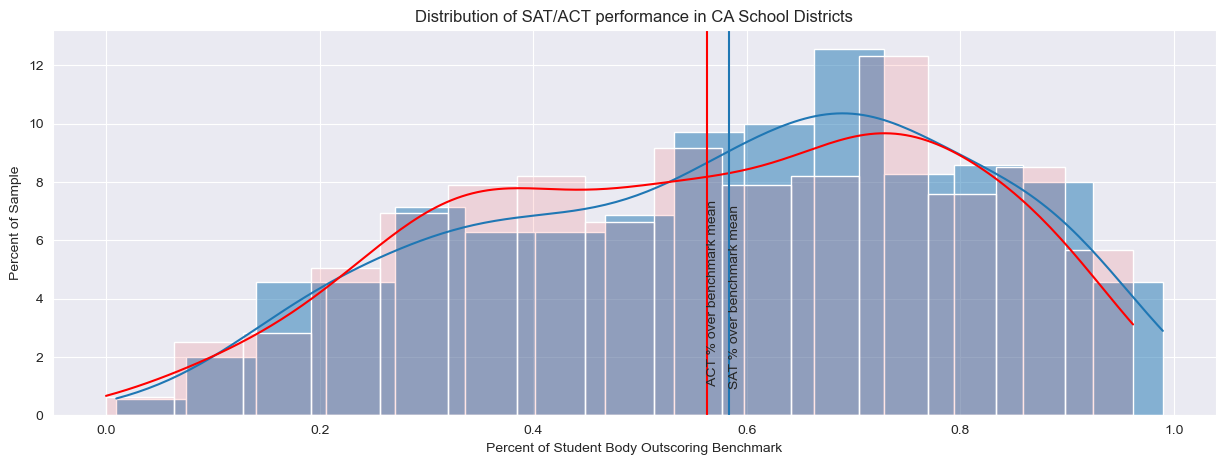

In [95]:
fig, axs = plt.subplots(1, figsize=(15,5))
sns.histplot(final_merged_df, x = 'sat_pct_both_over_benchmark', stat = 'percent', bins =15,kde=True)
sns.histplot(final_merged_df, x = 'act_pct_ge_21', stat = 'percent', bins = 15, alpha = 0.1, color='r', kde=True)
axs.set(title = 'Distribution of SAT/ACT performance in CA School Districts')
axs.axvline(final_merged_df['sat_pct_both_over_benchmark'].mean())
axs.axvline(final_merged_df['act_pct_ge_21'].mean(), color = 'red')
plt.text(final_merged_df.act_pct_ge_21.mean(), 1,' ACT % over benchmark mean', rotation=90)
plt.text(final_merged_df.sat_pct_both_over_benchmark.mean(), 1,'SAT % over benchmark mean', rotation=90)
axs.set(xlabel='Percent of Student Body Outscoring Benchmark', ylabel = 'Percent of Sample');

**Boxplot visualization of distribution of SAT and ACT scores amongst 393 CA School Districts**

The box and whiskers plot featured below again demonstrates the similarity in distribution of SAT and ACT scores amongst the 393 school district sample. The plots show a simlar mean, level of variance, and inner quartile range. This visualization reinforces what the numerical summary statistics and histograms presented above have outlined, the ACT/SAT yield similar levels of student performance.

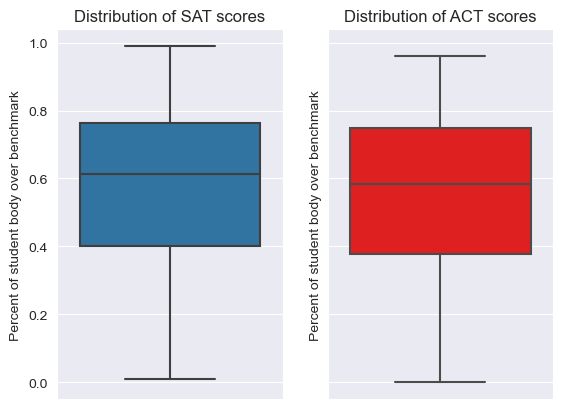

In [96]:
fig, axs = plt.subplots(1,2, sharey = True)

# final_merged_df['sat_pct_both_over_benchmark']
sns.boxplot(y = final_merged_df['sat_pct_both_over_benchmark'], ax = axs[0])
axs[0].set(title='Distribution of SAT scores', ylabel = 'Percent of student body over benchmark')
sns.boxplot(y = final_merged_df['act_pct_ge_21'], ax=axs[1], color='r')
axs[1].set(title='Distribution of ACT scores', ylabel = 'Percent of student body over benchmark');

### Exploring Differences in Results Between Subjects Across SAT/ACT

The SAT is broken into two sections Mathematics and Exploratory Reading and Writing (E.R.W.), the ACT is subdivided into four sections, Mathematics, English, Science and Writing. These sections can generally be bucketed by S.T.E.M and non-S.T.E.M. subjects. Is there a gap in performance between the two ? The plot below demonstrates that readiness-benchmark performance in mathematics significantly lags E.R.W. benchmark performance in the SAT with more than 70% of CA school districts meeting the E.R.W. benchmarks and just under 50% meeting the mathematics benchmarks.

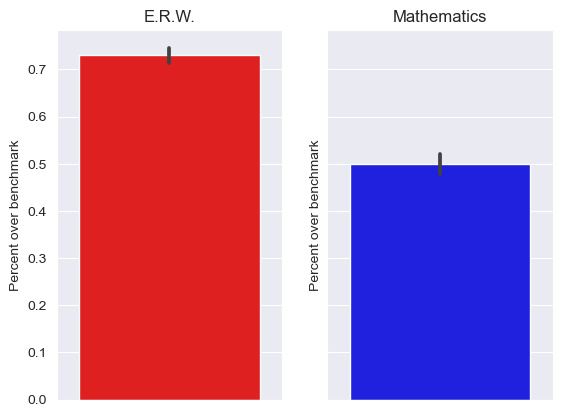

In [216]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.barplot(final_merged_df, y= 'sat_pct_math_over_benchmark', color = 'b' , ax = axs[1])
axs[1].set(title = 'Mathematics', ylabel = 'Percent over benchmark')
sns.barplot(final_merged_df, y= 'sat_pct_erw_over_benchmark', color = 'r' , ax = axs[0]);
axs[0].set_title('E.R.W.')
axs[0].set(title = 'E.R.W.', ylabel = 'Percent over benchmark');

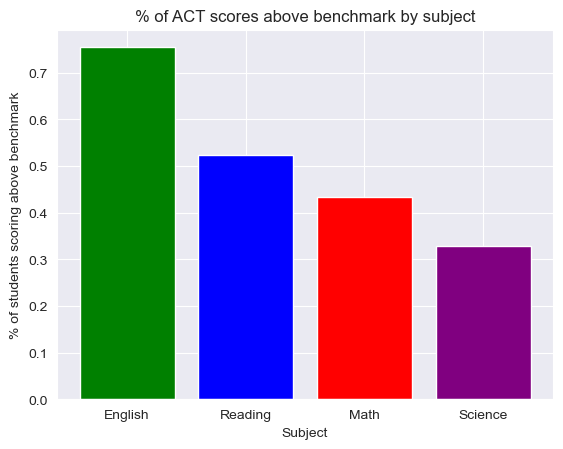

In [275]:
# english
fig = plt.subplots(1)
eng = len(final_merged_df.query('act_avg_scr_eng >= 18'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height= eng, x = 'English', color = 'green')
#reading
read = len(final_merged_df.query('act_avg_scr_read >= 22'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height = read, x = 'Reading', color = 'blue')
#math
math = len(final_merged_df.query('act_avg_scr_math >= 22'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height = math, x = 'Math', color = 'red')
#science
sci = len(final_merged_df.query('act_avg_scr_sci >= 23'))/len(final_merged_df.query('act_num_tst_takr > 1'))
plt.bar(height = sci, x = 'Science', color = 'purple')
plt.title('% of ACT scores above benchmark by subject')
plt.ylabel('% of students scoring above benchmark')
plt.xlabel('Subject');

### Sorting School Districts by ACT/ SAT Performance on Combined Math and E.R.W./Lit. Benchmarks

The difference in benchmark performance between the upper and lower 10 CA school districts is stark regardless of the adoption of the SAT or ACT. Amongst the upper 10, all had 90% or more of their student body surpass the college readiness-benchmark. Amongst the lower 10 school districts, all had less than 20% of their student body score above the readiness benchmarks. Additionally, the variance for both samples is low.

**Conclusion**

The data suggests a stark difference in outcome between CA school districts. The data also suggests that the use of the SAT over the ACT or vice versa does not play in influential role in student body test score outcome. Now that the difference in outcome is clearly delineated, we will try to find statistics that correlate with under and over performance.

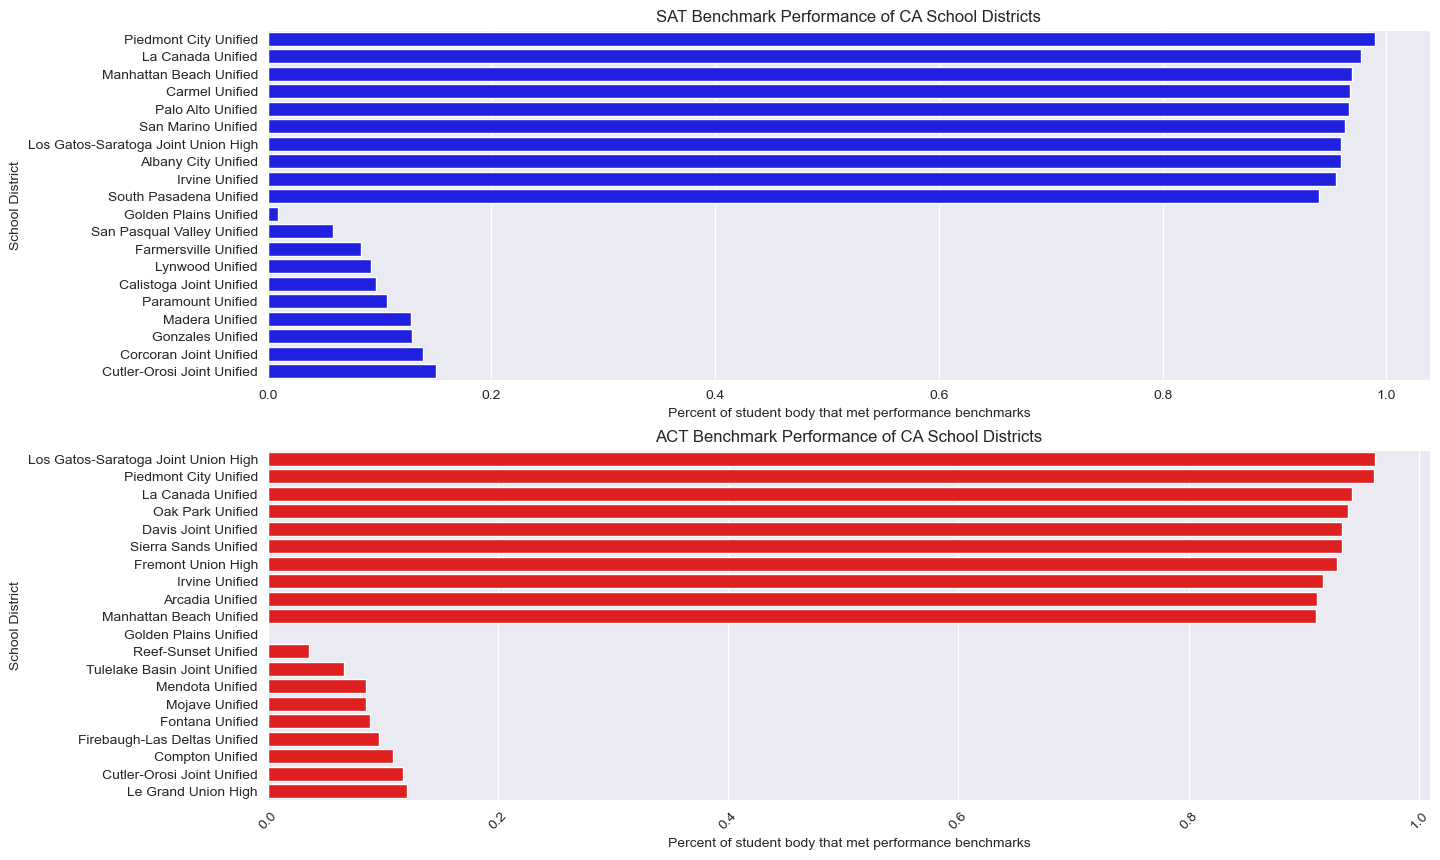

In [187]:
comparison_df_sat = pd.concat([top_ten_sat,bottom_ten_sat])
comparison_df_act = pd.concat([top_ten_act,bottom_ten_act])

fig, axs = plt.subplots(2,1, figsize=(15,10))
sns.barplot(comparison_df_sat, x = 'sat_pct_both_over_benchmark', y = 'd_name', color = 'b', ax = axs[0])

axs[0].set(title = 'SAT Benchmark Performance of CA School Districts', ylabel = 'School District',
        xlabel = 'Percent of student body that met performance benchmarks')
plt.xticks(rotation=45);
sns.barplot(comparison_df_act, x ='act_pct_ge_21', y = 'd_name', color = 'r', ax = axs[1])

axs[1].set(title = 'ACT Benchmark Performance of CA School Districts', ylabel = 'School District',
        xlabel = 'Percent of student body that met performance benchmarks');

## Examining the percent of E.R.W. and Math SAT Scores over the benchmark

### Exploratory Reading and Writing
Amongst the top 10 CA School districts, over performance relative to the CollegeBoard E.R.W. benchmarks was almost uniform across the districts, with a mean value of $98.8$% of the student body within the highest 10 school districts out performing the benchmark, with very little variance - the top district had a 100% level of outperformance and the lowest district had a 97% level of outperformance.

Amongst the bottom 10 CA school districts the mean level of benchmark outperformance was $38.8$ %. with more variance, the bottom district had a cumulative outperformance rate of $18.2$% with the highest performing district student body at $58$ %.

### Mathematics

Amongst the top 10 performing CA school districts, over performance relative to the CollegeBoard mathematics benchmarks was again almost unfiorm accross the districts, with a mean value of $97$ % of the students in the top 10 school districts out performing the CA math benchmarks. Again, as with E.R.W., the variance was low across the top 10 school districts, with the lowest performing district achieving a $95.6$% outperformance level and the top district achieving a $98.6$% outperformance level.

Amongst the bottom 10 CA school districts, the mean level of performance in mathematics was $28$% lower than E.R.W. with a mean level of student outperformance at $11$% with the top performing district achieving a $17.7$% level of outperformance and the bottom performing district achieving a $00.9$% level of outperformance.

### Analysis

The data suggests that California school districts generally outperform at a higher frequency in E.R.W. than in mathematics. Amongst the lowest performing school districts, the difference in outperformance between E.R.W. and mathematics was far more stark than amongst the highest performing school districts.

The data suggests that amongst the top school districts, $98.8$% of students have a 75% probability of earning a **C** or higher in a first semester college course in literature, social sciences or writing, and $95.6$% of the students have a 75% probability of earning a **C** or higher in a first semester college course in algebra, statistics, precalculus or calculus.

Text(0.5, 1.0, 'Comparative District Performance on Math')

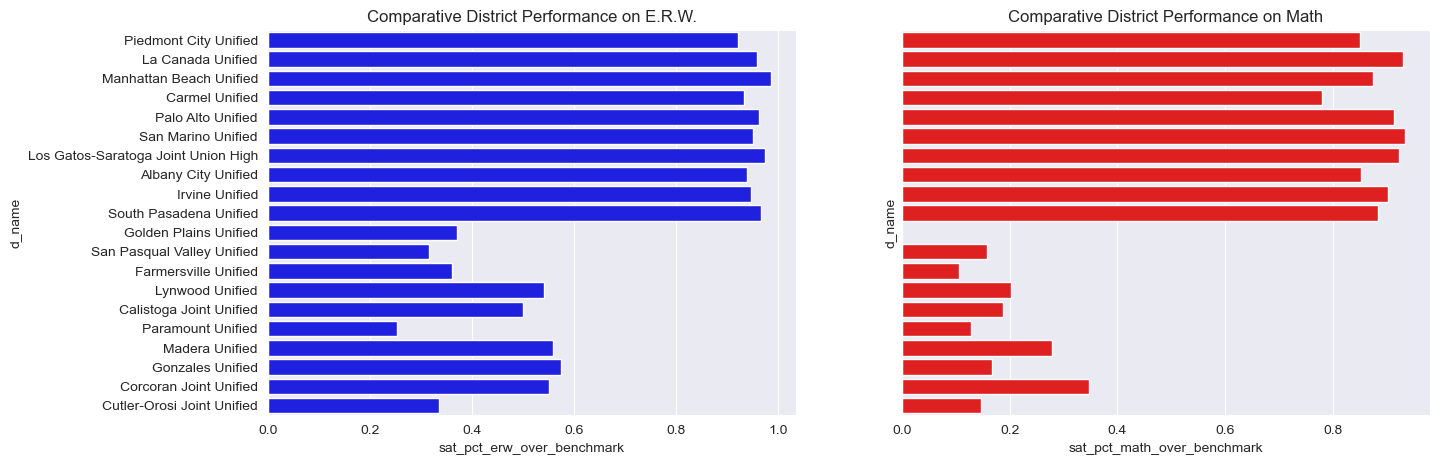

In [127]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(15, 5))
# erw plot
sns.barplot(comparison_df_sat, x = 'sat_pct_erw_over_benchmark', y = 'd_name', ax = axs[0], color = 'b')
axs[0].set_title('Comparative District Performance on E.R.W.')
# axs[0].tick_params(labelrotation=90)
# math plot
sns.barplot(comparison_df_sat, x = 'sat_pct_math_over_benchmark', y = 'd_name', ax = axs[1], color = 'r')
axs[1].set_title('Comparative District Performance on Math')
# fig.tight_layout()
# axs[1].tick_params(labelrotation=90)


### Math is Harder is Harder to Teach

<AxesSubplot:xlabel='sat_pct_math_over_benchmark', ylabel='d_name'>

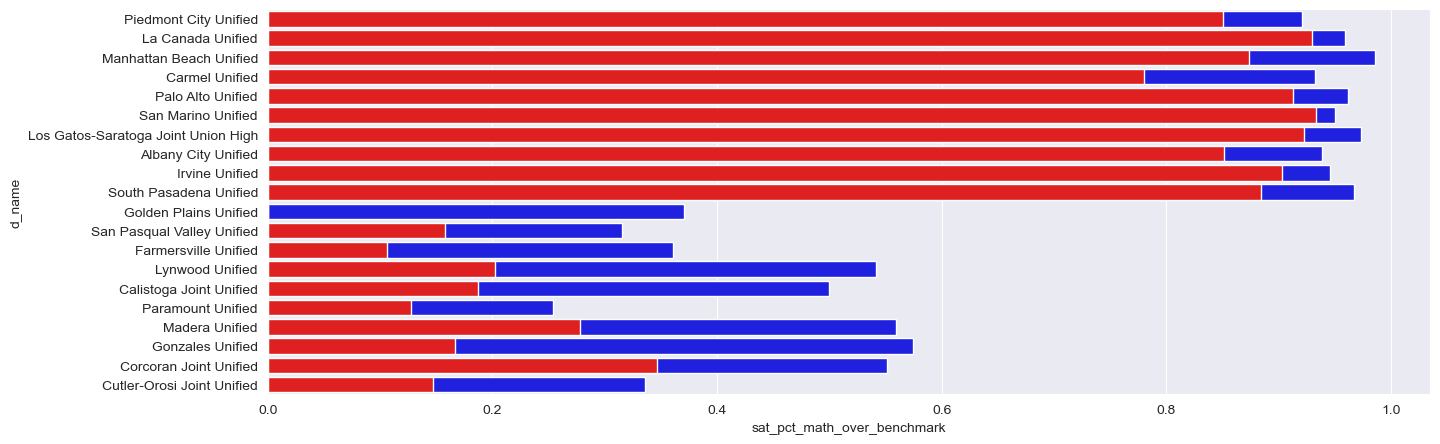

In [138]:
fig, axs = plt.subplots(1, figsize=(15,5))
sns.barplot(comparison_df_sat, x = 'sat_pct_erw_over_benchmark', y = 'd_name', color = 'b')
sns.barplot(comparison_df_sat, x = 'sat_pct_math_over_benchmark', y = 'd_name', color = 'r')


We see that across the 393 school district population, around 50 % of school district met the SAT readiness benchmark, whilst over 70% met the E.R.W. readiness benchmark.

Comparing ACT performance in Lit, Science and Math

Text(0.5, 1.0, 'Comparative District Performance on Science')

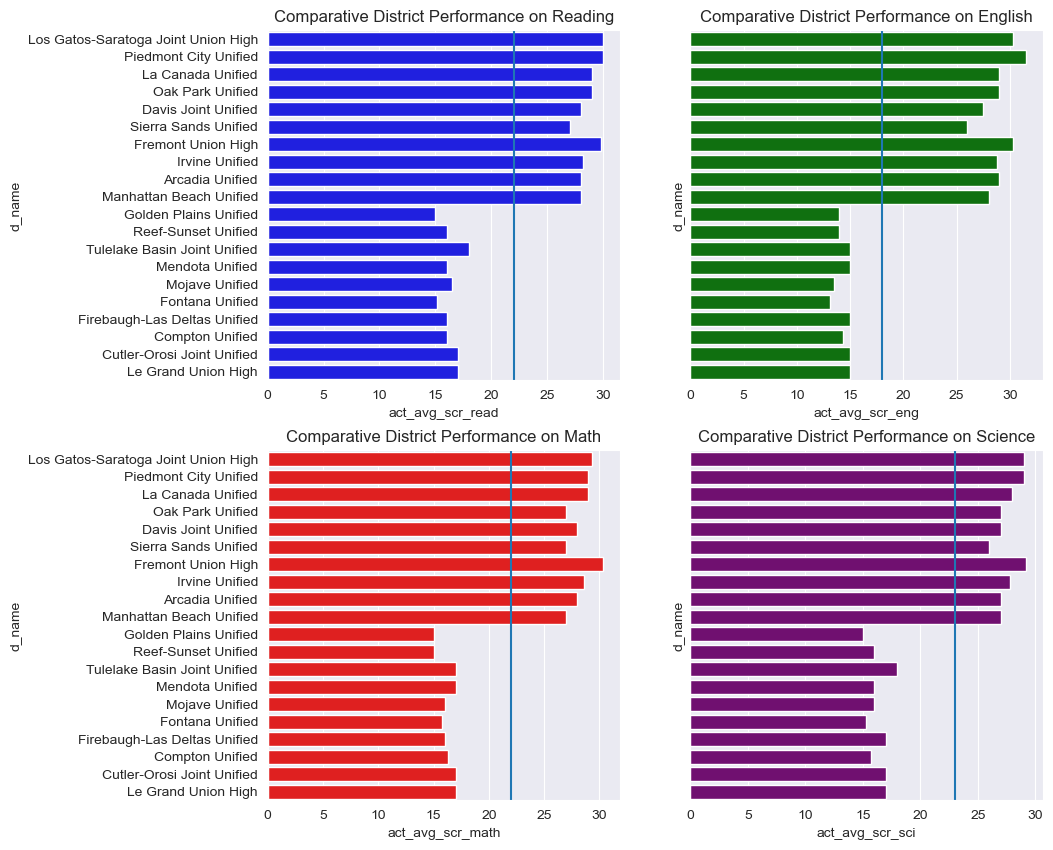

In [128]:
fig, axs = plt.subplots(2,2, sharey=True, figsize=(10,10))
axs = axs.flatten()
# reading
sns.barplot(comparison_df_act, x = 'act_avg_scr_read', y = 'd_name', ax = axs[0], color = 'b')
axs[0].axvline(22)
axs[0].set_title('Comparative District Performance on Reading')
# english
sns.barplot(comparison_df_act, x = 'act_avg_scr_eng', y = 'd_name', ax = axs[1], color = 'g')
axs[1].axvline(18)
axs[1].set_title('Comparative District Performance on English')
# math
sns.barplot(comparison_df_act, x = 'act_avg_scr_math', y = 'd_name', ax = axs[2], color = 'r')
axs[2].axvline(22)
axs[2].set_title('Comparative District Performance on Math')
# science
sns.barplot(comparison_df_act, x = 'act_avg_scr_sci', y = 'd_name', ax = axs[3], color = 'purple')
axs[3].axvline(23)
axs[3].set_title('Comparative District Performance on Science')


### Investigating Correlations between over and under performance

<AxesSubplot:>

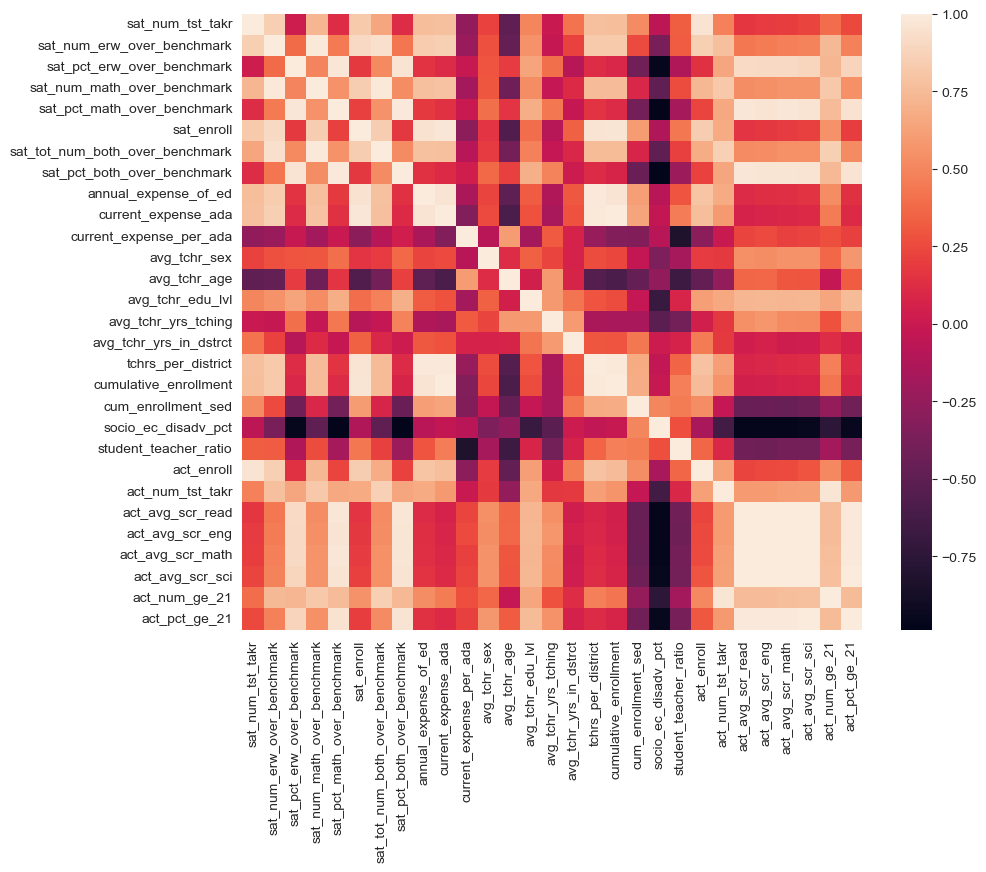

In [102]:
correlations = comparison_df_sat.corr()
# correlations
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlations, ax=ax)

### The effect of teacher education level on SAT performance

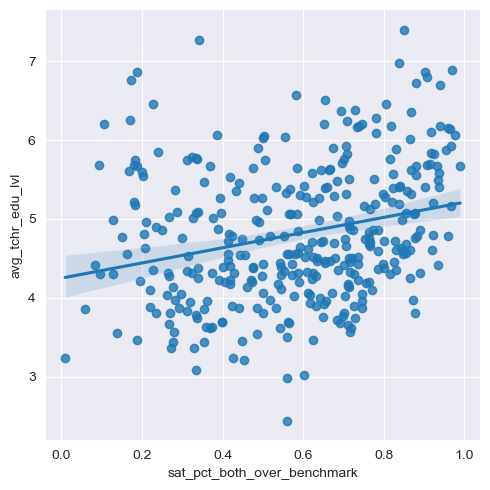

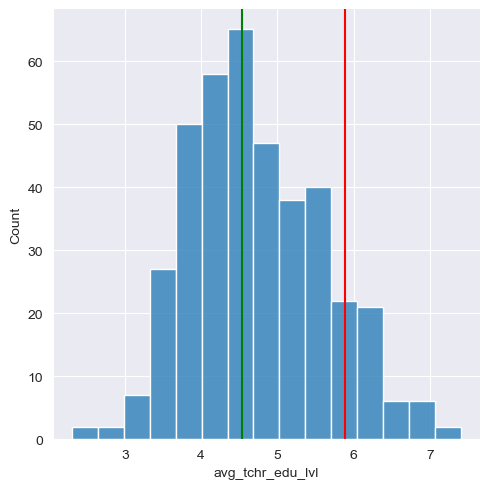

In [119]:
# Code
# px.scatter(final_merged_df,'pct_both_over_benchmark', 'avg_tchr_edu_lvl', color = 'poverty_pct', trendline='ols')
sns.lmplot(final_merged_df, x='sat_pct_both_over_benchmark', y='avg_tchr_edu_lvl');

fig2 = sns.displot(final_merged_df, x = 'avg_tchr_edu_lvl')
plt.axvline(top_ten_sat['avg_tchr_edu_lvl'].mean(), color = 'r')
plt.axvline(bottom_ten_sat['avg_tchr_edu_lvl'].mean(), color = 'g')

### The effect of student teacher ratio on SAT performance

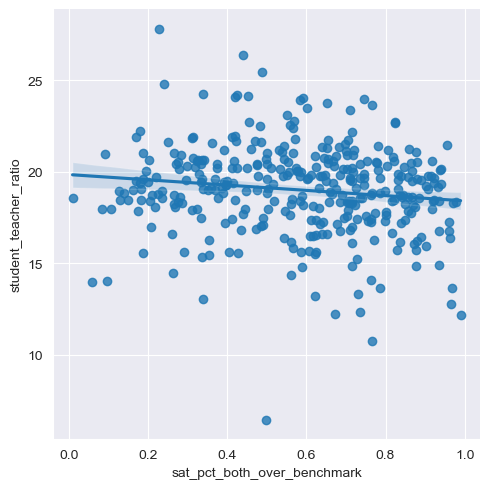

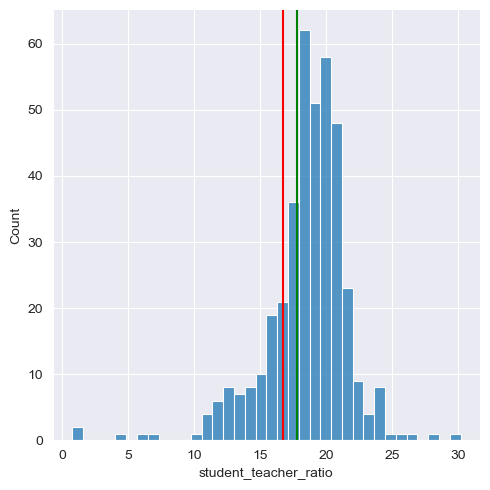

In [120]:
# px.scatter(final_merged_df, 'pct_both_over_benchmark', 'student_teacher_ratio', trendline='ols')
sns.lmplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'student_teacher_ratio');
fig2 = sns.displot(final_merged_df, x = 'student_teacher_ratio')
plt.axvline(top_ten_sat['student_teacher_ratio'].mean(), color = 'r')
plt.axvline(bottom_ten_sat['student_teacher_ratio'].mean(), color = 'g')

### The effect of socioeconomic disadvantage on SAT performance

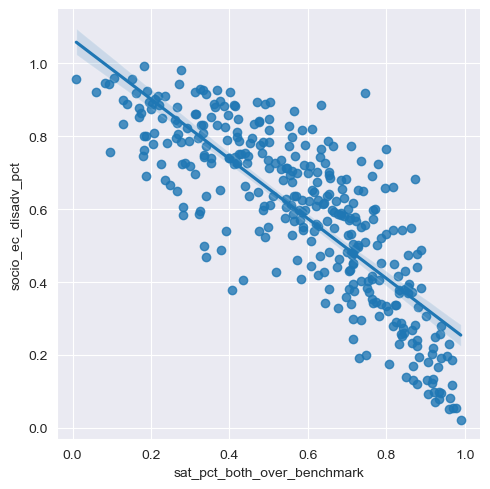

In [121]:
# px.scatter(final_merged_df, 'pct_both_over_benchmark', 'poverty_pct', trendline = 'ols')
sns.lmplot(final_merged_df, x = 'sat_pct_both_over_benchmark', y = 'socio_ec_disadv_pct');

## conclusions and recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!